In [1]:
# Studying the resolution of the "Direct Offset measuremeNts UTilizing Electro Optic Sampling (DONUT-EOS)"
from importlib import reload as rel;
import matplotlib.pyplot as plt;
import numpy as np;
from scipy.constants import c, epsilon_0;
from scipy.interpolate import interp2d
from scipy.signal import find_peaks;
from time import time;
eps0 = epsilon_0;
#from scipy.interpolate import interp1d;
import sys;
sys.path.insert(0, "../../python");
sys.path.insert(0, "..\\..\\python");
sys.path.insert(0, "../transverse_resolution/");
# Custom modules
from crystal import crystal;
from ebeam import ebeam;
from laser import laser;
import phase_retard as pr;
from plotting import makefig;
import thz;
import vertical_resolution as vr;
import donut as dn;
dn = rel(dn)
def get_peaks(signal, init_cutoff, step):
    cutoff = init_cutoff
    while True:
        inds, heights = find_peaks(signal, height = cutoff)
        if len(inds <= 2):
            return inds
        else:
            cutoff += step

In [2]:
# Bunch parameters
################################################################################
Q_drive = 1.5e-9;
Q_wit   = 0.5e-9;
sigz    = 5.2e-6;
sigt    = sigz / c;
del_z   = 150e-6;
del_t   = del_z / c;
N       = 8000;
t_beams = np.linspace(-N * sigt / 2, N * sigt / 2, N);
drive   = ebeam({'Q' : Q_drive, 'sigz' : sigz, 'del_z' : 0, 't' : t_beams});
wit     = ebeam({'Q' : Q_wit, 'sigz' : sigz, 'del_z' : del_z, 't' : t_beams});
################################################################################
# Crystal parameters
ctype = 'GaP';
d     = 100e-6;
x     = 1e-2;
y     = 1e-2;
rez   = 10e-6;
nx    = int(x/rez);
ny    = int(y/rez);
x0    = [0.1e-3, 0.1e-3]
y0    = [0.0e-3, 0.0e-3];
x_arr = np.linspace(-x/2, x/2, nx);
y_arr = np.linspace(-y/2, y/2, ny);
tau   = np.zeros((len(x_arr), len(y_arr)));

################################################################################
# Probe laser
lambda0 = 800e-9;
dy = 27e-9;
tp = 30e-15;
psi = 15;
psi_rad = psi * np.pi / 180;
probe = laser({'y0' : lambda0, 'dy' : dy, 'tp' : tp})
td    = 4.0e-12;

In [3]:
wit_params   = {'Q' : Q_wit, 'sigz' : sigz, 'del_z' : 0, 't' : t_beams}
direction    = ['x', '+'];
dz = np.arange(125, 176, 5) * 1e-6;
sig_offset = np.zeros(len(dz));


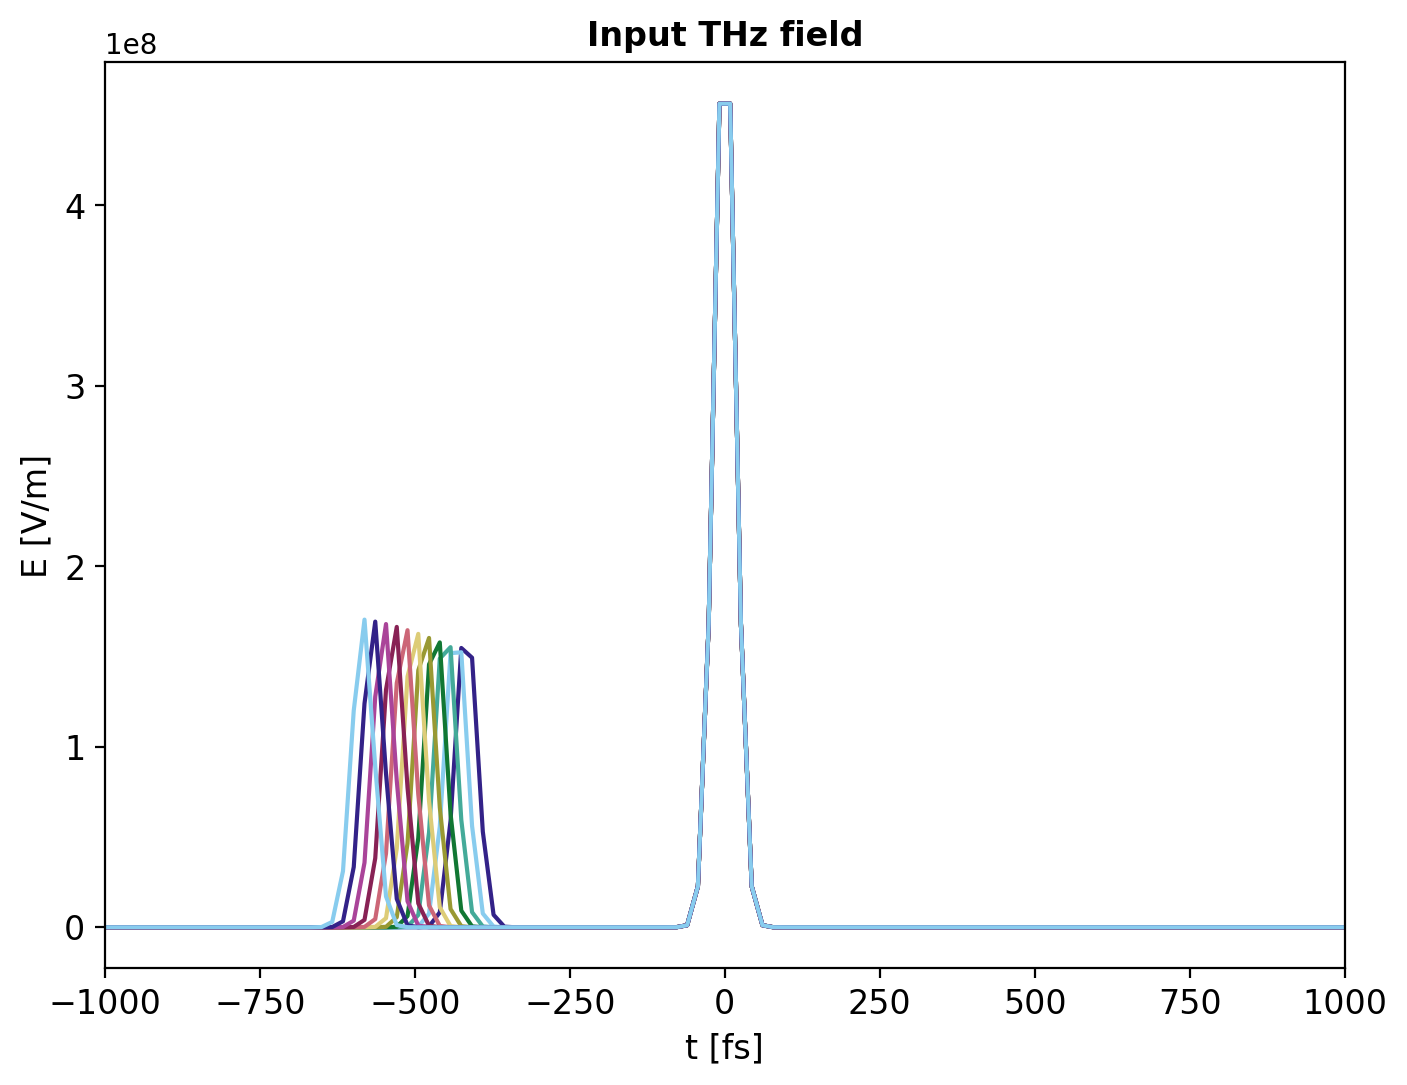

In [8]:
fig2, ax2 = makefig(x = 8, y = 6, xlab = 't [fs]', ylab = 'E [V/m]', title = 'Input THz field')
for i in range(len(dz)):
    wit_params['del_z'] = dz[i];
    wit   = ebeam(wit_params);
    wit.get_Er(4e-3);
    drive.get_Er(4e-3);
    ax2.plot(drive.t * 1e15, wit.Er + drive.Er)
ax2.set_xlim([-1000, 1000])
plt.show();

1 of 11
Initalizing for loop...
Looping...
2 of 11
Initalizing for loop...
Looping...
3 of 11
Initalizing for loop...
Looping...
4 of 11
Initalizing for loop...
Looping...
5 of 11
Initalizing for loop...
Looping...
6 of 11
Initalizing for loop...
Looping...
7 of 11
Initalizing for loop...
Looping...
8 of 11
Initalizing for loop...
Looping...
9 of 11
Initalizing for loop...
Looping...
10 of 11
Initalizing for loop...
Looping...
11 of 11
Initalizing for loop...
Looping...


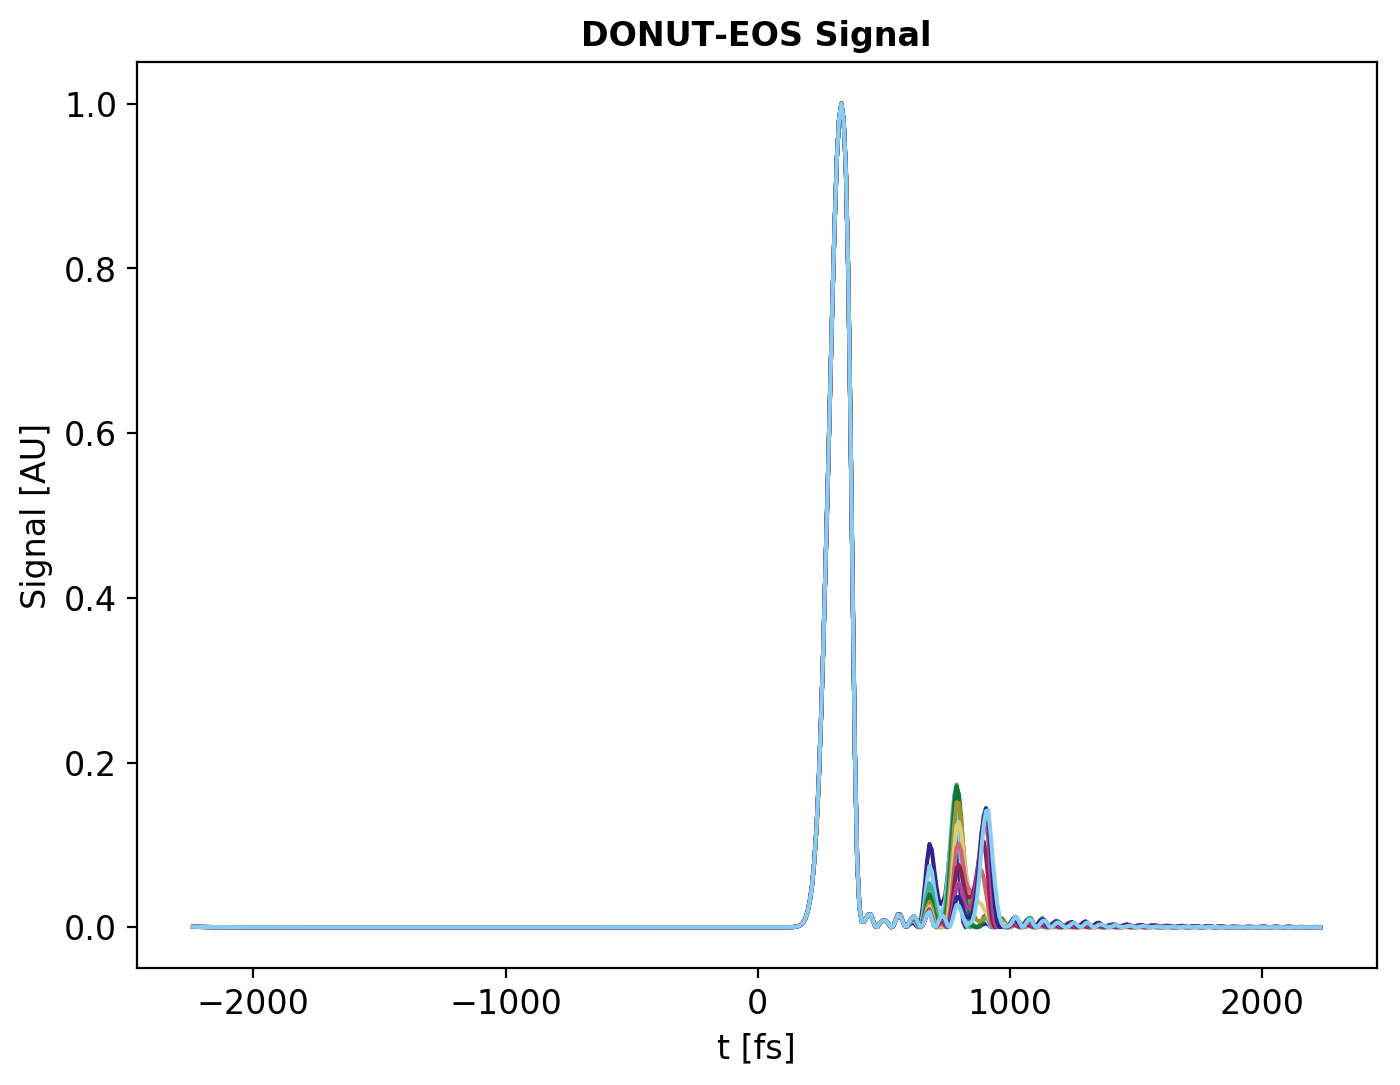

485.01184248924255


In [9]:
# Gaussian input
    if False:
    fig1, ax1 = makefig(x = 8, y = 6, xlab = 't [fs]', ylab = 'Signal [AU]', title = 'DONUT-EOS Signal');
    start = time();
    for i in range(len(dz)):
        print(i+1, "of", len(dz));
        wit_params['del_z'] = dz[i];
        wit   = ebeam(wit_params);
        g_drive, g_wit, gma = dn.get_signal(drive, wit, probe, psi, ctype, d, x0, x, y0, y, td);
        x_int   = np.linspace(-x/2, x/2, 1000);
        y_int   = np.linspace(-y/2, y/2, 1000);
        f_gma   = interp2d(x_int, y_int, gma);
        gma_int = f_gma(x_arr, y_arr); 
        sig = np.sin(gma_int / 2)**2;
        lineout, t_plot = dn.radial_lineout(sig, x_arr, y_arr, direction, psi);
        ax1.plot(t_plot, lineout / max(lineout));
        inds = get_peaks(lineout, 0.05, 0.05);
        sig_offset[i] = abs(t_plot[inds[0]] - t_plot[inds[-1]]);
    plt.show();
    print(time() - start);

In [10]:
for i in range(len(dz)):
    print(np.round(dz[i] * 1e6), np.round(c * sig_offset[i] * 1e-15 * 1e6));

125.0 0.0
130.0 134.0
135.0 137.0
140.0 137.0
145.0 137.0
150.0 0.0
155.0 0.0
160.0 0.0
165.0 0.0
170.0 0.0
175.0 0.0


In [21]:
dz = 125e-6;
%matplotlib tk
wit_params['del_z'] = dz
wit   = ebeam(wit_params);
g_drive, g_wit, gma = dn.get_signal(drive, wit, probe, psi, ctype, d, x0, x, y0, y, td);
x_int   = np.linspace(-x/2, x/2, 1000);
y_int   = np.linspace(-y/2, y/2, 1000);
f_gma   = interp2d(x_int, y_int, gma);
gma_int = f_gma(x_arr, y_arr); 
sig = np.sin(gma_int / 2)**2;
lineout, t_plot = dn.radial_lineout(sig, x_arr, y_arr, direction, psi);
plt.plot(t_plot, lineout);

Initalizing for loop...
Looping...
